# Linear Regression with One Feature

We will show the result of fitting a line to a univariate dataset as a starting point to understanding linear regression, as well as future discussions about model fitting in  general.

In [85]:
# you may need to install sklearn first...
!pip install sklearn

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [86]:
#Some Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

# Loading Data

In [87]:
# read data into pandas dataframe from csv
df = pd.read_csv('cars.csv')

## The full dataset is shown here

In [88]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


For this notebook, however, we are only looking at the "mpg" (label), and "weight" (feature), columns.  For the multivariate case see (TODO:  Add link)

In [89]:
df[['mpg','weight']].head(10)

,mpg,weight
0,18.0,3504.0
1,15.0,3693.0
2,18.0,3436.0
3,16.0,3433.0
4,17.0,3449.0
5,15.0,4341.0
6,14.0,4354.0
7,14.0,4312.0
8,14.0,4425.0
9,15.0,3850.0


# Solving a simple linear regression

## A column of ones must be added so that $w_0$ corresponds to the intercept.

In [6]:
# use only the weight column as a single feature
def add_const(X):
    return np.concatenate((np.ones(shape=(X.shape[0],1)),X),axis=1)
X = df[['weight']]
# add a column of ones so that there can be an intercept term
X = add_const(X)
y = df.mpg.values

## A quick view of the data to be modeled

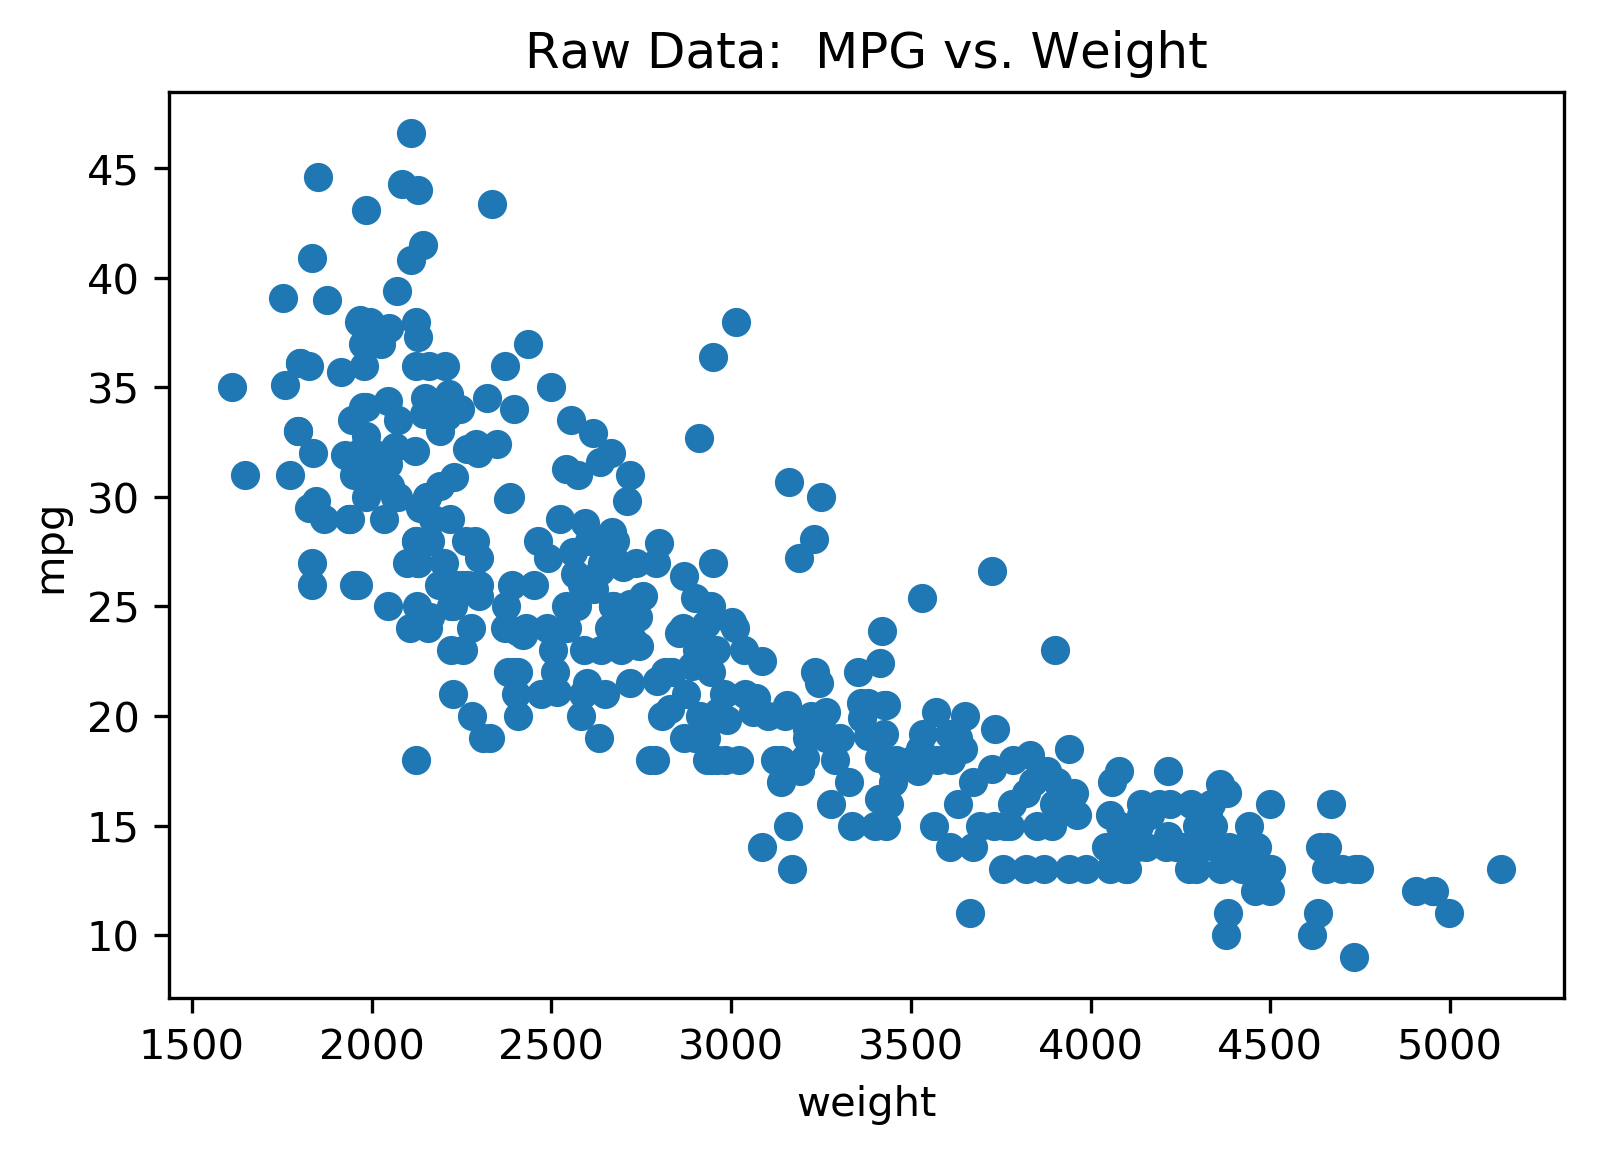

In [50]:
dpi = 300 #dots per square inch when plotting...higher resolution for publications.
plt.rcParams['figure.dpi']= dpi



plt.scatter(df.weight, df.mpg)

plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("Raw Data:  MPG vs. Weight")
plt.show()

In [91]:
print(X)

[[1.000e+00 3.504e+03]
 [1.000e+00 3.693e+03]
 [1.000e+00 3.436e+03]
 [1.000e+00 3.433e+03]
 [1.000e+00 3.449e+03]
 [1.000e+00 4.341e+03]
 [1.000e+00 4.354e+03]
 [1.000e+00 4.312e+03]
 [1.000e+00 4.425e+03]
 [1.000e+00 3.850e+03]
 [1.000e+00 3.563e+03]
 [1.000e+00 3.609e+03]
 [1.000e+00 3.761e+03]
 [1.000e+00 3.086e+03]
 [1.000e+00 2.372e+03]
 [1.000e+00 2.833e+03]
 [1.000e+00 2.774e+03]
 [1.000e+00 2.587e+03]
 [1.000e+00 2.130e+03]
 [1.000e+00 1.835e+03]
 [1.000e+00 2.672e+03]
 [1.000e+00 2.430e+03]
 [1.000e+00 2.375e+03]
 [1.000e+00 2.234e+03]
 [1.000e+00 2.648e+03]
 [1.000e+00 4.615e+03]
 [1.000e+00 4.376e+03]
 [1.000e+00 4.382e+03]
 [1.000e+00 4.732e+03]
 [1.000e+00 2.130e+03]
 [1.000e+00 2.264e+03]
 [1.000e+00 2.228e+03]
 [1.000e+00 2.046e+03]
 [1.000e+00 2.634e+03]
 [1.000e+00 3.439e+03]
 [1.000e+00 3.329e+03]
 [1.000e+00 3.302e+03]
 [1.000e+00 3.288e+03]
 [1.000e+00 4.209e+03]
 [1.000e+00 4.464e+03]
 [1.000e+00 4.154e+03]
 [1.000e+00 4.096e+03]
 [1.000e+00 4.955e+03]
 [1.000e+00

## Numpy Analytical Solution:  The Normal Equation

Find the linear least squares solution to the problem:

$$y=\mathbf{X}\mathbf{w}$$

Where $X$ is a matrix of features, with each column corresponding to a certain feature (like horsepower)

The least squares solution is:

$$\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\\
\mathbf{\hat{y}}=\mathbf{X}\mathbf{\hat{w}}$$

For this notebook, we will only solve the Normal Equation.  In (TODO: add link), we will present a gradient descent algorithm.

Numpy supports a variety of syntaxes.  Since we are expressing our solution as matrix operations, we will use the last approach for the most part.  This is not always preferred in larger codes because the operators are overloaded for the matrix types here, and can be ambiguous to those not familiar with matrix notation.

In [56]:
# compute solution from explicit matrix operations
print("using dot products and inverse")
w_Hat = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print (w_Hat)

# using numpy pseudo-inverse function
print("\nusing dot products and pseudo inverse")
w_Hat = np.dot(np.linalg.pinv(X), y)
print (w_Hat)

# using numpy matrix objects
print("\nusing matrix multiply, transpose and matrix inverse")
X_mat = np.mat(X)
y_mat = np.mat(y).T
w_Hat = (X_mat.T*X_mat).I*X_mat.T*y_mat # much more concise
print (np.array(w_Hat).ravel())

using dot products and inverse
[ 4.63173644e+01 -7.67661006e-03]

using dot products and pseudo inverse
[ 4.63173644e+01 -7.67661006e-03]

using matrix multiply, transpose and matrix inverse
[ 4.63173644e+01 -7.67661006e-03]


## Inspection of the DataFrame of labels and features

In [77]:
(df[['mpg','weight']]).head(10)

,mpg,weight
0,18.0,3504.0
1,15.0,3693.0
2,18.0,3436.0
3,16.0,3433.0
4,17.0,3449.0
5,15.0,4341.0
6,14.0,4354.0
7,14.0,4312.0
8,14.0,4425.0
9,15.0,3850.0


In [72]:
# compute the best fit line and find r-squared
yhat_numpy = np.dot(X, w_Hat)
print ("R-squared = %1.5f" % r2_score(y, yhat_numpy))
r2 = r2_score(y, yhat_numpy)

R-squared = 0.69179


R-squared = 0.69179


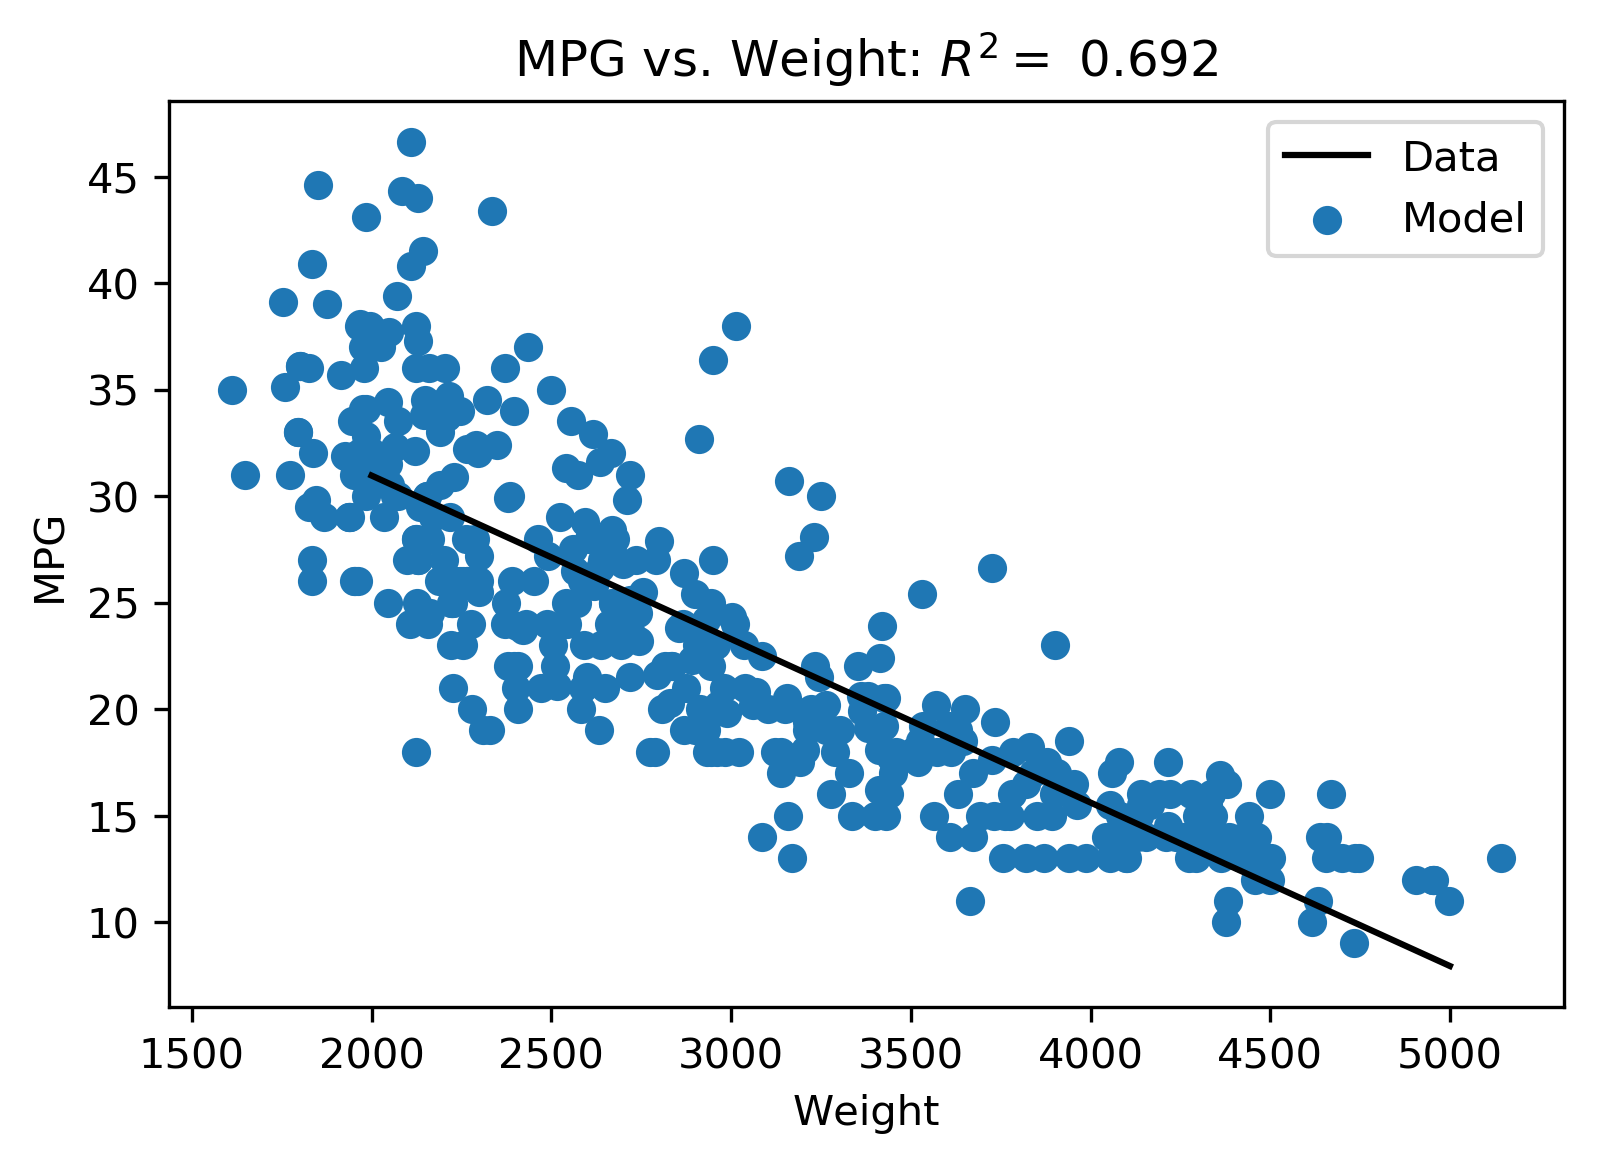

In [83]:
# compute the best fit line and find r-squared
yhat_numpy = np.dot(X, w_Hat)
print ("R-squared = %1.5f" % r2_score(y, yhat_numpy))
r2 = r2_score(y, yhat_numpy)

xplt = np.matrix(np.arange(2000,5000))
yplt=xplt*w_Hat[1,0]+w_Hat[0,0]
#plt.plot(xplt.T,yplt.T)


plt.scatter(df.weight, df.mpg)
plt.plot(xplt.T, yplt.T, 'k')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs. Weight: $R^2 = $ ' + str(np.round(r2,3)))
plt.legend(['Data', 'Model'])

plt.show()